# Effect of high frequency noise on binning

In [1]:
from pylab import *

## defining functions to re-bin 

In [2]:
#only for bin_sizes
def rebin(y,bin_size):
    return convolve(ones(bin_size)*1.0/bin_size,y,mode="same")[::bin_size]

def t_to_f(t):
    return arange(0,1/mean(diff(t))/2.0,1/(max(t)-min(t)))

## generating signal

### time domain

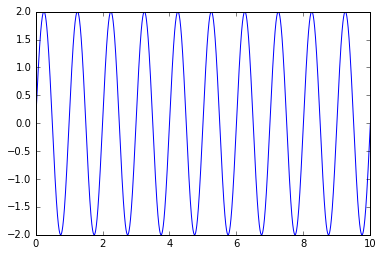

In [3]:
t = arange(0,10,.001)
f = t_to_f(t)
w_low = 2*pi*1
y_signal = y_noise_free = 2*sin(w_low*t)
plot(t,y_signal)
show()

### frequency domain

/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/ana-1.2.9-py3/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


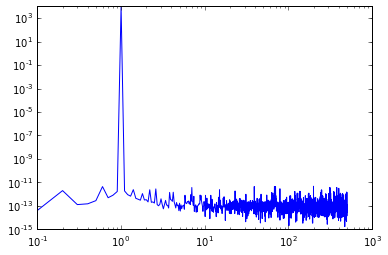

In [4]:
plot(f,abs(fft(y_signal))[:len(y_signal)/2])
loglog()
show()

## generating high frequency noise

### time domain

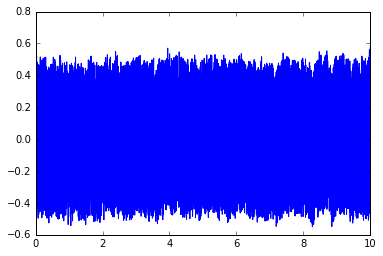

In [34]:
convolution_size = 100
y_noise = rand(len(y_signal))
y_noise -= 0.99*convolve(ones(convolution_size)*1.0/convolution_size,y_noise,mode='same') #getting rid of low frequency noise
plot(t,y_noise)
show()

### frequency domain

/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/ana-1.2.9-py3/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


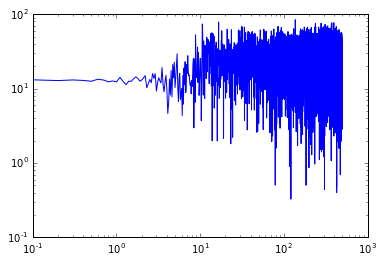

In [35]:
plot(f,abs(fft(y_noise))[:len(y_noise)/2])
loglog()
show()

## adding signal and noise

### time domain

/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/ana-1.2.9-py3/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


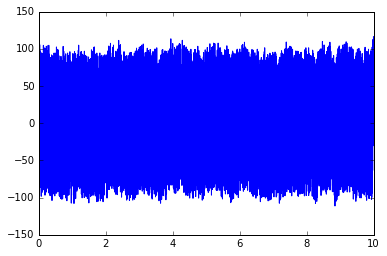

In [36]:
y = y_signal+200*y_noise
my_fft = abs(fft(y))[:len(y)/2]
plot(t,y)
show()

### frequency domain (convincing signal)

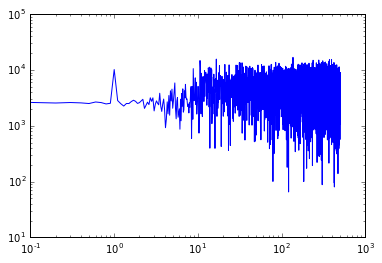

In [37]:
plot(f,my_fft)
loglog()
show()

## rebinning: solution never looks nice in time domain

bin size = 100


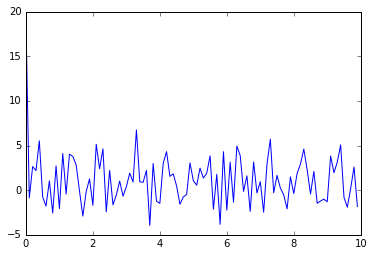

/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/ana-1.2.9-py3/lib/python3.5/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


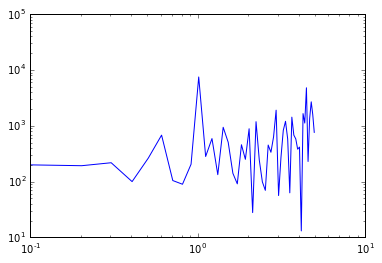

bin size = 50


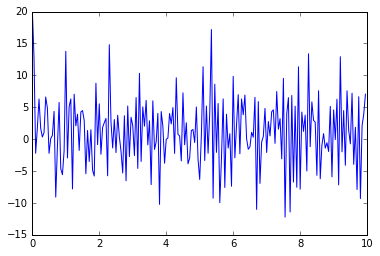

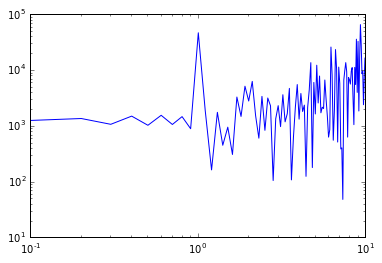

bin size = 10


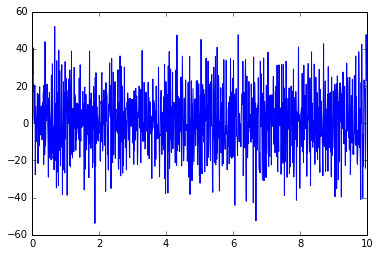

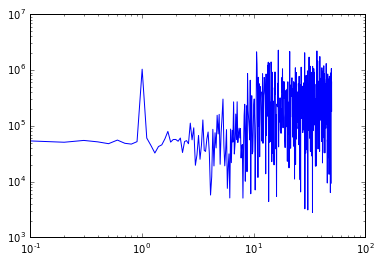

In [40]:
#######
#change this number to change bin size
#######
bin_size = 10

#######
for bin_size in [100,50,10]:
    print("bin size = "+str(bin_size))
    y_rebin = rebin(y,bin_size)
    t_rebin = rebin(t,bin_size)
    plot(t_rebin,y_rebin,'-')
    show()
    rebinned_fft = (abs(fft(y_rebin))[:len(y_rebin)/2])**2
    f_rebinned = t_to_f(t_rebin)
    plot(f_rebinned,rebinned_fft)
    #loglog()
    loglog()
    show()